In [34]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}

headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'b54bcf4d-1bca-4e8e-9a24-22ff2c3d462c',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


{'status': {'timestamp': '2025-09-08T04:49:44.378Z', 'error_code': 0, 'error_message': None, 'elapsed': 1, 'credit_count': 1, 'notice': None}, 'data': [{'id': 1258, 'name': '2o0f266sted', 'symbol': 'o87cul9tpt', 'slug': 'cxy69nuwqdu', 'cmc_rank': 2788, 'num_market_pairs': 4530, 'circulating_supply': 3068, 'total_supply': 4055, 'max_supply': 5968, 'infinite_supply': None, 'last_updated': '2025-09-08T04:49:44.378Z', 'date_added': '2025-09-08T04:49:44.378Z', 'tags': ['zegpiv6qaqk', '9ar9y8d386', '0e4nednj8xch', '8ge6u7mly39', 'xna74pr0g3', 'hduvkda9txg', 'iiudk9chf1q', 'zid6fe5j7', '7g7w4f8kxu3', 'pj4yttpshfj'], 'platform': None, 'self_reported_circulating_supply': None, 'self_reported_market_cap': None, 'quote': {'USD': {'price': 0.18369039076013127, 'volume_24h': 3293, 'volume_change_24h': 0.8167328435697252, 'percent_change_1h': 0.1550727649251873, 'percent_change_24h': 0.20046231428337613, 'percent_change_7d': 0.2209297625476474, 'market_cap': 0.976627104849483, 'market_cap_dominance'

In [35]:
type(data)

dict

In [36]:
import pandas as pd

In [37]:
df=pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now')
df

,id,name,symbol,slug,cmc_rank,num_market_pairs,circulating_supply,total_supply,max_supply,infinite_supply,...,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,timestamp
0,1258,2o0f266sted,o87cul9tpt,cxy69nuwqdu,2788,4530,3068,4055,5968,None,...,3293,0.81673,0.15507,0.20046,0.22093,0.97663,5791,0.91608,2025-09-08T04:49:44.378Z,2025-09-07 22:49:44.888902
1,2818,uvxexr69dxo,24l52lgpsa7j,fb6jtlsu33p,2009,9111,8860,9961,6402,None,...,5661,0.34445,0.57298,0.29976,0.81626,0.27884,8907,0.91989,2025-09-08T04:49:44.378Z,2025-09-07 22:49:44.888902
2,7206,cli0oglhecl,0hpwvmguij8e,d6l6iwrkdpj,2080,4153,951,6285,3246,None,...,5473,0.79121,0.66881,0.28280,0.43058,0.35150,1839,0.78178,2025-09-08T04:49:44.378Z,2025-09-07 22:49:44.888902
3,7230,ypjbb0wgppf,ezxu9wa528,ahlf3xj0149,4095,7554,4051,2964,298,None,...,3276,0.77361,0.39020,0.10467,0.38409,0.80861,6785,0.32587,2025-09-08T04:49:44.378Z,2025-09-07 22:49:44.888902
4,4960,ixwjrjt6lkq,0ifaxgdwvyw5,dczbfmhsceb,1310,6549,4035,4288,1452,None,...,7936,0.49194,0.21707,0.13980,0.65508,0.47817,9841,0.66094,2025-09-08T04:49:44.378Z,2025-09-07 22:49:44.888902
5,7120,x3iix8k5gu8,y1ypkab39za,a8fstkkq0v9,1961,6042,6190,8855,9435,None,...,4023,0.97193,0.66872,0.66825,0.44168,0.08332,3044,0.81006,2025-09-08T04:49:44.378Z,2025-09-07 22:49:44.888902
6,1501,4pfmrblrops,nmbmv80949,6y10m7pnh0c,4221,8253,9805,7995,5488,None,...,9919,0.17948,0.26634,0.12679,0.46107,0.91316,9232,0.42714,2025-09-08T04:49:44.378Z,2025-09-07 22:49:44.888902
7,4831,dcucqwa9u6e,41d8j76n36z,8y9pkhn7zpe,9120,746,6556,1616,8575,None,...,9691,0.00394,0.17425,0.68040,0.08981,0.80664,3524,0.95933,2025-09-08T04:49:44.378Z,2025-09-07 22:49:44.888902
8,8742,fzzc01n6706,49l4n1lyvoh,1ht44s50zxz,1442,4706,1068,9502,6511,None,...,3880,0.61679,0.61407,0.80346,0.58741,0.17253,8046,0.69289,2025-09-08T04:49:44.378Z,2025-09-07 22:49:44.888902
9,6855,yegf8jmuxwi,zxmz2qj8cpc,4m51hhtezcf,9583,5089,2398,3129,1278,None,...,312,0.20793,0.39946,0.19875,0.04754,0.85790,5858,0.76505,2025-09-08T04:49:44.378Z,2025-09-07 22:49:44.888902


In [38]:
def api_runner():
    global df
    url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
    }
    headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'b54bcf4d-1bca-4e8e-9a24-22ff2c3d462c',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2=pd.json_normalize(data['data'])
    df2['timestamp']=pd.to_datetime('now')
    df=pd.concat([df,df2], ignore_index=True)

In [39]:
import os
from time import time
from time import sleep

for i in range(10):
    api_runner()
    print('API Runner completed')
    sleep(10)
exit()

API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [40]:
df

,id,name,symbol,slug,cmc_rank,num_market_pairs,circulating_supply,total_supply,max_supply,infinite_supply,...,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,timestamp
0,1258,2o0f266sted,o87cul9tpt,cxy69nuwqdu,2788,4530,3068,4055,5968,None,...,3293,0.81673,0.15507,0.20046,0.22093,0.97663,5791,0.91608,2025-09-08T04:49:44.378Z,2025-09-07 22:49:44.888902
1,2818,uvxexr69dxo,24l52lgpsa7j,fb6jtlsu33p,2009,9111,8860,9961,6402,None,...,5661,0.34445,0.57298,0.29976,0.81626,0.27884,8907,0.91989,2025-09-08T04:49:44.378Z,2025-09-07 22:49:44.888902
2,7206,cli0oglhecl,0hpwvmguij8e,d6l6iwrkdpj,2080,4153,951,6285,3246,None,...,5473,0.79121,0.66881,0.28280,0.43058,0.35150,1839,0.78178,2025-09-08T04:49:44.378Z,2025-09-07 22:49:44.888902
3,7230,ypjbb0wgppf,ezxu9wa528,ahlf3xj0149,4095,7554,4051,2964,298,None,...,3276,0.77361,0.39020,0.10467,0.38409,0.80861,6785,0.32587,2025-09-08T04:49:44.378Z,2025-09-07 22:49:44.888902
4,4960,ixwjrjt6lkq,0ifaxgdwvyw5,dczbfmhsceb,1310,6549,4035,4288,1452,None,...,7936,0.49194,0.21707,0.13980,0.65508,0.47817,9841,0.66094,2025-09-08T04:49:44.378Z,2025-09-07 22:49:44.888902
5,7120,x3iix8k5gu8,y1ypkab39za,a8fstkkq0v9,1961,6042,6190,8855,9435,None,...,4023,0.97193,0.66872,0.66825,0.44168,0.08332,3044,0.81006,2025-09-08T04:49:44.378Z,2025-09-07 22:49:44.888902
6,1501,4pfmrblrops,nmbmv80949,6y10m7pnh0c,4221,8253,9805,7995,5488,None,...,9919,0.17948,0.26634,0.12679,0.46107,0.91316,9232,0.42714,2025-09-08T04:49:44.378Z,2025-09-07 22:49:44.888902
7,4831,dcucqwa9u6e,41d8j76n36z,8y9pkhn7zpe,9120,746,6556,1616,8575,None,...,9691,0.00394,0.17425,0.68040,0.08981,0.80664,3524,0.95933,2025-09-08T04:49:44.378Z,2025-09-07 22:49:44.888902
8,8742,fzzc01n6706,49l4n1lyvoh,1ht44s50zxz,1442,4706,1068,9502,6511,None,...,3880,0.61679,0.61407,0.80346,0.58741,0.17253,8046,0.69289,2025-09-08T04:49:44.378Z,2025-09-07 22:49:44.888902
9,6855,yegf8jmuxwi,zxmz2qj8cpc,4m51hhtezcf,9583,5089,2398,3129,1278,None,...,312,0.20793,0.39946,0.19875,0.04754,0.85790,5858,0.76505,2025-09-08T04:49:44.378Z,2025-09-07 22:49:44.888902


In [41]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [42]:
df

,id,name,symbol,slug,cmc_rank,num_market_pairs,circulating_supply,total_supply,max_supply,infinite_supply,...,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,timestamp
0,1258,2o0f266sted,o87cul9tpt,cxy69nuwqdu,2788,4530,3068,4055,5968,None,...,3293,0.81673,0.15507,0.20046,0.22093,0.97663,5791,0.91608,2025-09-08T04:49:44.378Z,2025-09-07 22:49:44.888902
1,2818,uvxexr69dxo,24l52lgpsa7j,fb6jtlsu33p,2009,9111,8860,9961,6402,None,...,5661,0.34445,0.57298,0.29976,0.81626,0.27884,8907,0.91989,2025-09-08T04:49:44.378Z,2025-09-07 22:49:44.888902
2,7206,cli0oglhecl,0hpwvmguij8e,d6l6iwrkdpj,2080,4153,951,6285,3246,None,...,5473,0.79121,0.66881,0.28280,0.43058,0.35150,1839,0.78178,2025-09-08T04:49:44.378Z,2025-09-07 22:49:44.888902
3,7230,ypjbb0wgppf,ezxu9wa528,ahlf3xj0149,4095,7554,4051,2964,298,None,...,3276,0.77361,0.39020,0.10467,0.38409,0.80861,6785,0.32587,2025-09-08T04:49:44.378Z,2025-09-07 22:49:44.888902
4,4960,ixwjrjt6lkq,0ifaxgdwvyw5,dczbfmhsceb,1310,6549,4035,4288,1452,None,...,7936,0.49194,0.21707,0.13980,0.65508,0.47817,9841,0.66094,2025-09-08T04:49:44.378Z,2025-09-07 22:49:44.888902
5,7120,x3iix8k5gu8,y1ypkab39za,a8fstkkq0v9,1961,6042,6190,8855,9435,None,...,4023,0.97193,0.66872,0.66825,0.44168,0.08332,3044,0.81006,2025-09-08T04:49:44.378Z,2025-09-07 22:49:44.888902
6,1501,4pfmrblrops,nmbmv80949,6y10m7pnh0c,4221,8253,9805,7995,5488,None,...,9919,0.17948,0.26634,0.12679,0.46107,0.91316,9232,0.42714,2025-09-08T04:49:44.378Z,2025-09-07 22:49:44.888902
7,4831,dcucqwa9u6e,41d8j76n36z,8y9pkhn7zpe,9120,746,6556,1616,8575,None,...,9691,0.00394,0.17425,0.68040,0.08981,0.80664,3524,0.95933,2025-09-08T04:49:44.378Z,2025-09-07 22:49:44.888902
8,8742,fzzc01n6706,49l4n1lyvoh,1ht44s50zxz,1442,4706,1068,9502,6511,None,...,3880,0.61679,0.61407,0.80346,0.58741,0.17253,8046,0.69289,2025-09-08T04:49:44.378Z,2025-09-07 22:49:44.888902
9,6855,yegf8jmuxwi,zxmz2qj8cpc,4m51hhtezcf,9583,5089,2398,3129,1278,None,...,312,0.20793,0.39946,0.19875,0.04754,0.85790,5858,0.76505,2025-09-08T04:49:44.378Z,2025-09-07 22:49:44.888902


In [51]:
df3=df.groupby('name', sort=False)[[
    'quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 
]].mean()

In [52]:
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d
name,,,
2o0f266sted,0.15507,0.20046,0.22093
uvxexr69dxo,0.57298,0.29976,0.81626
cli0oglhecl,0.66881,0.28280,0.43058
ypjbb0wgppf,0.39020,0.10467,0.38409
ixwjrjt6lkq,0.21707,0.13980,0.65508
x3iix8k5gu8,0.66872,0.66825,0.44168
4pfmrblrops,0.26634,0.12679,0.46107
dcucqwa9u6e,0.17425,0.68040,0.08981
fzzc01n6706,0.61407,0.80346,0.58741


In [53]:
df4=df3.stack()
df4

name                                     
2o0f266sted  quote.USD.percent_change_1h    0.15507
             quote.USD.percent_change_24h   0.20046
             quote.USD.percent_change_7d    0.22093
uvxexr69dxo  quote.USD.percent_change_1h    0.57298
             quote.USD.percent_change_24h   0.29976
             quote.USD.percent_change_7d    0.81626
cli0oglhecl  quote.USD.percent_change_1h    0.66881
             quote.USD.percent_change_24h   0.28280
             quote.USD.percent_change_7d    0.43058
ypjbb0wgppf  quote.USD.percent_change_1h    0.39020
             quote.USD.percent_change_24h   0.10467
             quote.USD.percent_change_7d    0.38409
ixwjrjt6lkq  quote.USD.percent_change_1h    0.21707
             quote.USD.percent_change_24h   0.13980
             quote.USD.percent_change_7d    0.65508
x3iix8k5gu8  quote.USD.percent_change_1h    0.66872
             quote.USD.percent_change_24h   0.66825
             quote.USD.percent_change_7d    0.44168
4pfmrblrops  quote.USD

In [54]:
type(df4)

pandas.core.series.Series

In [55]:
df5=df4.to_frame(name='values')
df5

values
name                                            
2o0f266sted quote.USD.percent_change_1h  0.15507
            quote.USD.percent_change_24h 0.20046
            quote.USD.percent_change_7d  0.22093
uvxexr69dxo quote.USD.percent_change_1h  0.57298
            quote.USD.percent_change_24h 0.29976
            quote.USD.percent_change_7d  0.81626
cli0oglhecl quote.USD.percent_change_1h  0.66881
            quote.USD.percent_change_24h 0.28280
            quote.USD.percent_change_7d  0.43058
ypjbb0wgppf quote.USD.percent_change_1h  0.39020
            quote.USD.percent_change_24h 0.10467
            quote.USD.percent_change_7d  0.38409
ixwjrjt6lkq quote.USD.percent_change_1h  0.21707
            quote.USD.percent_change_24h 0.13980
            quote.USD.percent_change_7d  0.65508
x3iix8k5gu8 quote.USD.percent_change_1h  0.66872
            quote.USD.percent_change_24h 0.66825
            quote.USD.percent_change_7d  0.44168
4pfmrblrops quote.USD.percent_change_1h  0.26634
            quote.USD.percent_change_24h 0.12679
            quote.USD.percent_change_7d  0.46107
dcucqwa9u6e quote.USD.percent_change_1h  0.17425
            quote.USD.percent_change_24h 0.68040
            quote.USD.percent_change_7d  0.08981
fzzc01n6706 quote.USD.percent_change_1h  0.61407
            quote.USD.percent_change_24h 0.80346
            quote.USD.percent_change_7d  0.58741
yegf8jmuxwi quote.USD.percent_change_1h  0.39946
            quote.USD.percent_change_24h 0.19875
            quote.USD.percent_change_7d  0.04754

In [59]:
df5.count()

values    30
dtype: int64

In [62]:
df5.count().values[0]

np.int64(30)

In [63]:
index=pd.Index(range(30))
df6=df5.reset_index()
df6

,name,level_1,values
0,2o0f266sted,quote.USD.percent_change_1h,0.15507
1,2o0f266sted,quote.USD.percent_change_24h,0.20046
2,2o0f266sted,quote.USD.percent_change_7d,0.22093
3,uvxexr69dxo,quote.USD.percent_change_1h,0.57298
4,uvxexr69dxo,quote.USD.percent_change_24h,0.29976
5,uvxexr69dxo,quote.USD.percent_change_7d,0.81626
6,cli0oglhecl,quote.USD.percent_change_1h,0.66881
7,cli0oglhecl,quote.USD.percent_change_24h,0.28280
8,cli0oglhecl,quote.USD.percent_change_7d,0.43058
9,ypjbb0wgppf,quote.USD.percent_change_1h,0.39020


In [58]:
df7=df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,2o0f266sted,quote.USD.percent_change_1h,0.15507
1,2o0f266sted,quote.USD.percent_change_24h,0.20046
2,2o0f266sted,quote.USD.percent_change_7d,0.22093
3,uvxexr69dxo,quote.USD.percent_change_1h,0.57298
4,uvxexr69dxo,quote.USD.percent_change_24h,0.29976
5,uvxexr69dxo,quote.USD.percent_change_7d,0.81626
6,cli0oglhecl,quote.USD.percent_change_1h,0.66881
7,cli0oglhecl,quote.USD.percent_change_24h,0.28280
8,cli0oglhecl,quote.USD.percent_change_7d,0.43058
9,ypjbb0wgppf,quote.USD.percent_change_1h,0.39020


In [66]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d'], 
                                                      ['1hr', '24h', '7d'])

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

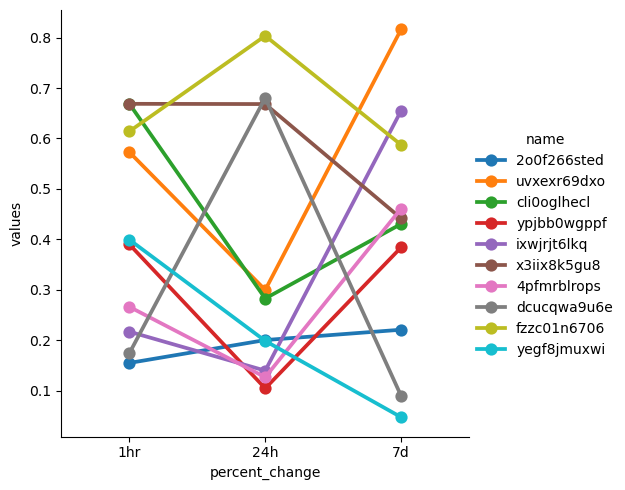

In [68]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [71]:
df10=df[['name', 'quote.USD.price', 'timestamp']]
df10.query("name=='2o0f266sted'")
#df10

,name,quote.USD.price,timestamp
0,2o0f266sted,0.18369,2025-09-07 22:49:44.888902
10,2o0f266sted,0.18369,2025-09-07 22:49:46.858626
20,2o0f266sted,0.18369,2025-09-07 22:49:57.777847
30,2o0f266sted,0.18369,2025-09-07 22:50:08.481179


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

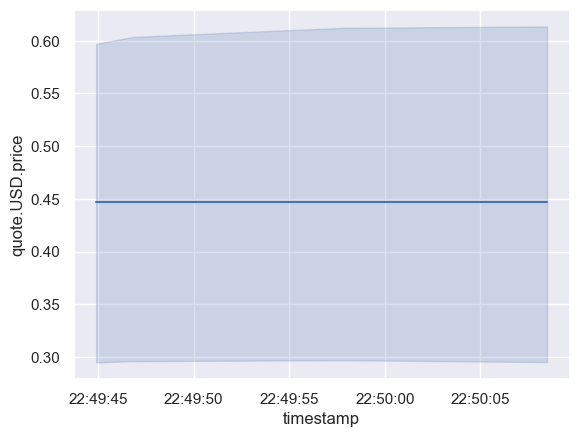

In [73]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)